In [1]:
# Arbitrage

In [2]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
from downloader import Downloader
from datetime import datetime, timedelta
importlib.reload(m)
dl = Downloader()

In [4]:
# eth = dl.get_timeseries_data("ETHUSDT", span="m", past=False, full=False, timeindex=True)
# eth1 = dl.get_timeseries_data("ETHBUSD", span="m", past=False, full=False, timeindex=True)
client = bh.new_binance_client()


In [55]:
start_date = dl.get_str_date(dl.get_date_from_int(1639198406000))

In [56]:
start_date

'11 Dec 2021 04:43:26'

In [57]:
pair="FISUSDT"
klines = client.get_historical_klines(pair, client.KLINE_INTERVAL_1MINUTE, start_date, limit=1000)
data = dl.get_filtered_dataframe(klines, True)

In [58]:
df = data.copy()
df['timestamp'] = list(map(lambda x: datetime.utcfromtimestamp(x/1e3), df.timestamp))
df = df.set_index('timestamp')

In [59]:
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2021-12-11 04:44:00,1.1692,1.1692,1.1692,1.1692,0.0,1.639198e+12,0.0000,0.0,0.0,0.0000,0.0
2021-12-11 04:45:00,1.1692,1.1692,1.1692,1.1692,0.0,1.639198e+12,0.0000,0.0,0.0,0.0000,0.0
2021-12-11 04:46:00,1.1655,1.1655,1.1655,1.1655,37.0,1.639198e+12,43.1235,1.0,0.0,0.0000,0.0
2021-12-11 04:47:00,1.1655,1.1655,1.1655,1.1655,0.0,1.639198e+12,0.0000,0.0,0.0,0.0000,0.0
2021-12-11 04:48:00,1.1655,1.1655,1.1655,1.1655,0.0,1.639198e+12,0.0000,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16 21:30:00,0.3189,0.3195,0.3189,0.3195,216.0,1.652737e+12,68.9070,2.0,41.0,13.0995,0.0
2022-05-16 21:31:00,0.3195,0.3195,0.3195,0.3195,0.0,1.652737e+12,0.0000,0.0,0.0,0.0000,0.0
2022-05-16 21:32:00,0.3195,0.3195,0.3195,0.3195,0.0,1.652737e+12,0.0000,0.0,0.0,0.0000,0.0


In [108]:
d = df.copy()

In [109]:
d = d[d.open != d.close]

In [120]:
d = d[-300:]

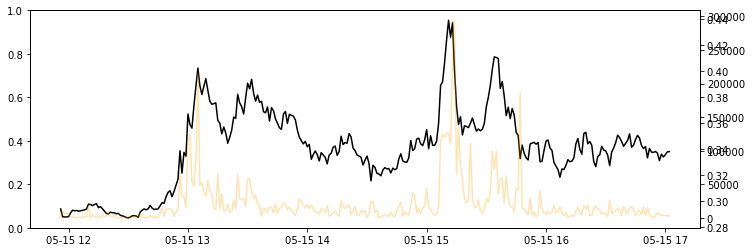

In [126]:
fig, ax = plt.subplots(figsize=(12, 4))
# ax.plot(d.trades, c="purple", alpha=0.5)
ax1 = ax.twinx()
ax1.plot(d.close, c="black")
ax2 = ax.twinx()
ax2.plot(d.quote_av, c="orange", alpha=0.3)
# ax2.plot(d.tb_quote_av, c="green", alpha=0.3)

<AxesSubplot:xlabel='timestamp'>

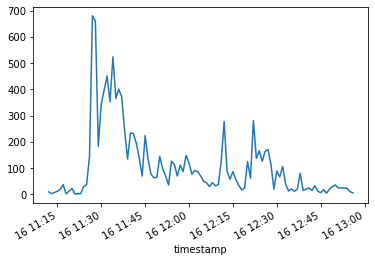

In [79]:
d.trades.plot()

<AxesSubplot:xlabel='timestamp'>

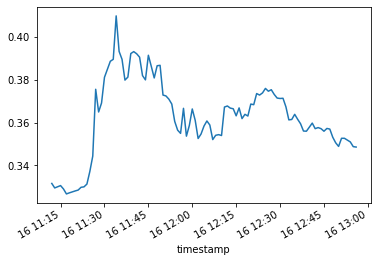

In [81]:
d.close.plot()